<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#PDF" data-toc-modified-id="PDF-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>PDF</a></span></li><li><span><a href="#SCR" data-toc-modified-id="SCR-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>SCR</a></span></li><li><span><a href="#Timeseries" data-toc-modified-id="Timeseries-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Timeseries</a></span></li></ul></li><li><span><a href="#Plot-SCR-with-stations-example" data-toc-modified-id="Plot-SCR-with-stations-example-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot SCR with stations example</a></span></li><li><span><a href="#PLOT-PDF-model-vs-obs" data-toc-modified-id="PLOT-PDF-model-vs-obs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PLOT PDF model vs obs</a></span></li></ul></div>

# Plot CO2

example of SCR

In [1]:
import sys
import os
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))
sys.path.append(src_path)
import bp12_tools as bp12
import bp12_tools.plot_utils as pu

import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib as mpl
from cartopy import crs as ccrs, feature as cfeature
from cmcrameri import cm
import cmocean as cmo

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

---

## Load Data

### PDF

In [2]:
pco2_bpdf_mdl = xr.open_dataset(f'../data/CO2/BIOPERIANT12_pco2_PDF_meanbiome_clim.nc')

In [3]:
pco2_pdf_mdl = xr.open_dataset(f'../data/CO2/BIOPERIANT12_pco2_PDF_SO.nc')

In [4]:
pco2_bpdf_obs = xr.open_dataset(f'../data/CO2/OBS_pCO2_PDF_biomes_clim.nc')
pco2_pdf_obs = xr.open_dataset(f'../data/CO2/OBS_pCO2_PDF_SO.nc')

### SCR

In [5]:
pco2_scr_mdl = xr.open_dataset(f"../data/CO2/BIOPERIANT12_pCO2_SCR_2000-2009.nc")
pco2_scr_mdl = pco2_scr_mdl.SCR.sel(lat=slice(-77,-30))

In [6]:
pco2_scr_obs = xr.open_dataset(f"../data/CO2/OBS_pCO2_SCR_2000-2009.nc")
pco2_scr_obs = pco2_scr_obs.SCR.sel(lat=slice(-77,-30))

### Timeseries

In [7]:
st0_mdl = xr.open_dataset(f"../data/CO2/STATIONS/BIOPERIANT12_timeseries_pco2_ST0_IA.nc")
st1_mdl = xr.open_dataset(f"../data/CO2/STATIONS/BIOPERIANT12_timeseries_pco2_ST1_IA.nc")
st2_mdl = xr.open_dataset(f"../data/CO2/STATIONS/BIOPERIANT12_timeseries_pco2_ST2_IA.nc")
st3_mdl = xr.open_dataset(f"../data/CO2/STATIONS/BIOPERIANT12_timeseries_pco2_ST3_IA.nc")
st4_mdl = xr.open_dataset(f"../data/CO2/STATIONS/BIOPERIANT12_timeseries_pco2_ST4_IA.nc")

In [8]:
st0_obs = xr.open_dataset(f"../data/CO2/STATIONS/OBS_timeseries_pco2_ST0_IA.nc")
st1_obs = xr.open_dataset(f"../data/CO2/STATIONS/OBS_timeseries_pco2_ST1_IA.nc")
st2_obs = xr.open_dataset(f"../data/CO2/STATIONS/OBS_timeseries_pco2_ST2_IA.nc")
st3_obs = xr.open_dataset(f"../data/CO2/STATIONS/OBS_timeseries_pco2_ST3_IA.nc")
st4_obs = xr.open_dataset(f"../data/CO2/STATIONS/OBS_timeseries_pco2_ST4_IA.nc")

---

## Plot SCR with stations example 

In [9]:
cmap_scr = cmo.tools.crop_by_percent(cm.romaO_r, 15, which='both', N=None) 
bounds = np.arange(0,1.1,0.1)
norm_scr = mpl.colors.BoundaryNorm(bounds, cmap_scr.N)

In [10]:
pylabel = f"pCO$_2$ {pu.formatting.get_name_mplstr(bp12.model_utils.get_varinfo('pco2','unit'))}"

In [11]:
latlon_stations= [(-43, 8), (-49, 0),  (-53, 0), (-65, 0)]

def plot_stations():
    for st,latlon_st in enumerate(latlon_stations):
        plt.text(latlon_st[1], latlon_st[0], str(st), 
                 color='k', fontsize=12, weight='bold',
                 transform = ccrs.PlateCarree(), zorder=1)
        
def plot_ts(axin, ylabelin, ia_st, clim_st, scr_st, xtl=True):
    axin.plot(ia_st.time, ia_st,  c='grey', zorder=1, label='ia')
    axin.plot(ia_st.time, clim_st, c='b', label='clim')
    axin.text(0.8, 0.05, f"SCR={scr_st:0.2f}", 
             fontsize=12, color='red', transform=axin.transAxes)
    axin.grid(zorder=1, lw=1, ls='-', c='0.75', alpha=0.5)
    #axin.set_xlim(['2000-01-01', '2010-01-01'])
    axin.set_xlim([pd.Timestamp(2000,1,1), pd.Timestamp(2010,1,1)])
    axin.set_ylim([round(np.nanmin(ia_st.values),-1),round(np.nanmax(ia_st.values),-1)])
    axin.set_yticks(np.arange(round(np.nanmin(ia_st.values),-1),round(np.nanmax(ia_st.values),-1)+10,20))
    axin.xaxis.set_major_locator(mpl.dates.YearLocator(1) )
    axin.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
    if not xtl: axin.set_xticklabels([])
    axin.tick_params(labelsize=12)
    axin.set_ylabel(pylabel, labelpad=5, fontsize=12)
    axin.set_rasterized(True)

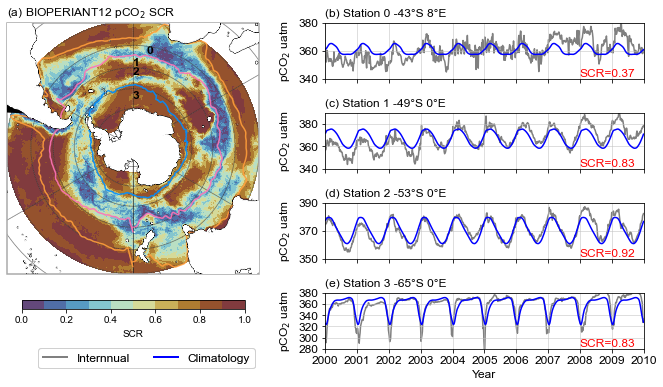

In [12]:
fig, axs = plt.subplots(4, 8, constrained_layout=True, figsize=(12, 6))
gs = axs[0, 0].get_subplotspec().get_gridspec()
gs.update(wspace=0.6, hspace=0.6)
[a.remove() for i in range(8) for a in axs[:, i]]
        
ax = fig.add_subplot(gs[:, :4], projection = ccrs.Stereographic(central_latitude=-90))
plt.title(f'(a) BIOPERIANT12 pCO$_2$ SCR', loc ='left',fontsize=12)
mesh = ax.pcolormesh(pco2_scr_mdl.lon, pco2_scr_mdl.lat, pco2_scr_mdl,
                     norm=norm_scr, cmap=cmap_scr,
                     transform = ccrs.PlateCarree(),zorder=0)
cb = plt.colorbar(mesh, orientation='horizontal', shrink=0.7, aspect = 25, pad = 0.08)
cb.set_label("SCR", labelpad=5)
pu.maps.map_decorator(ax)
pu.maps.add_biomes(ax, dataset="mdl")
plot_stations()
ax.set_rasterized(True)


line_ia    = mpl.lines.Line2D([], [], color='grey', lw=2, label='Internnual')
line_clim  = mpl.lines.Line2D([], [], color='b', lw=2, label='Climatology')
leg1 = ax.legend(handles = [line_ia,line_clim], ncol=2, fontsize=12, 
                  bbox_to_anchor=(0.1, -0.4), loc="lower left",frameon=True)
ax.add_artist(leg1)

#--- TIMESERIES ---
ax0 = fig.add_subplot(gs[0, 4:])
st=0
ptitle = f"(b) Station {st} {latlon_stations[st][0]}\u00b0S {latlon_stations[st][1]}\u00b0E"
plot_ts(ax0, pylabel, st0_mdl.ia, st0_mdl.clim, float(st0_mdl.attrs['SCR']), False)
plt.title(ptitle, loc ='left',fontsize=12)

ax1 = fig.add_subplot(gs[1, 4:])
st=1
ptitle = f"(c) Station {st} {latlon_stations[st][0]}\u00b0S {latlon_stations[st][1]}\u00b0E"
plot_ts(ax1, pylabel, st1_mdl.ia, st1_mdl.clim, float(st1_mdl.attrs['SCR']), False)
plt.title(ptitle, loc ='left',fontsize=12)

ax2 = fig.add_subplot(gs[2, 4:])
st=2
ptitle = f"(d) Station {st} {latlon_stations[st][0]}\u00b0S {latlon_stations[st][1]}\u00b0E"
plot_ts(ax2, pylabel, st2_mdl.ia, st2_mdl.clim, float(st2_mdl.attrs['SCR']), False)
plt.title(ptitle, loc ='left',fontsize=12)

ax3 = fig.add_subplot(gs[3, 4:])
st=3
ptitle = f"(e) Station {st} {latlon_stations[st][0]}\u00b0S {latlon_stations[st][1]}\u00b0E"
plot_ts(ax3, pylabel, st3_mdl.ia, st3_mdl.clim, float(st3_mdl.attrs['SCR']))
plt.title(ptitle, loc ='left',fontsize=12)
ax3.set_xlabel("Year",fontsize=12)

fig.tight_layout()
plt.savefig(f'../figures/S12.png', bbox_inches='tight')

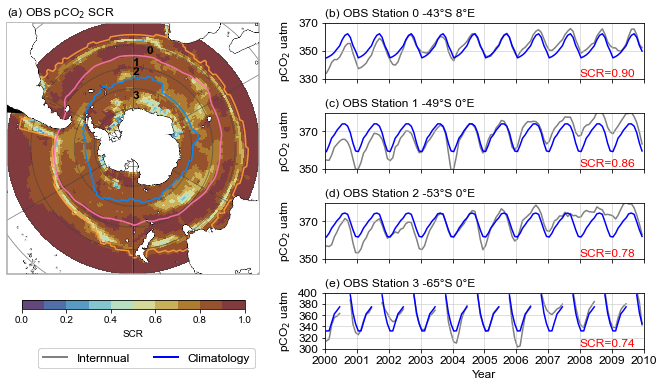

In [13]:
fig, axs = plt.subplots(4, 8, constrained_layout=True, figsize=(12, 6))
gs = axs[0, 0].get_subplotspec().get_gridspec()
gs.update(wspace=0.6, hspace=0.6)
[a.remove() for i in range(8) for a in axs[:, i]]
        
ax = fig.add_subplot(gs[:, :4], projection = ccrs.Stereographic(central_latitude=-90))
plt.title(f'(a) OBS pCO$_2$ SCR', loc ='left',fontsize=12)
mesh = ax.pcolormesh(pco2_scr_obs.lon, pco2_scr_obs.lat, pco2_scr_obs,
                     norm=norm_scr, cmap=cmap_scr,
                     transform = ccrs.PlateCarree(),zorder=0)
cb = plt.colorbar(mesh, orientation='horizontal', shrink=0.7, aspect = 25, pad = 0.08)
cb.set_label("SCR", labelpad=5)
pu.maps.map_decorator(ax)
pu.maps.add_biomes(ax, dataset="obs")
plot_stations()
ax.set_rasterized(True)


line_ia    = mpl.lines.Line2D([], [], color='grey', lw=2, label='Internnual')
line_clim  = mpl.lines.Line2D([], [], color='b', lw=2, label='Climatology')
leg1 = ax.legend(handles = [line_ia,line_clim], ncol=2, fontsize=12, 
                  bbox_to_anchor=(0.1, -0.4), loc="lower left",frameon=True)
ax.add_artist(leg1)

#--- TIMESERIES ---
ax0 = fig.add_subplot(gs[0, 4:])
st=0
ptitle = f"(b) OBS Station {st} {latlon_stations[st][0]}\u00b0S {latlon_stations[st][1]}\u00b0E"
plot_ts(ax0, pylabel, st0_obs.ia, st0_obs.clim, float(st0_obs.attrs['SCR']), False)
plt.title(ptitle, loc ='left',fontsize=12)

ax1 = fig.add_subplot(gs[1, 4:])
st=1
ptitle = f"(c) OBS Station {st} {latlon_stations[st][0]}\u00b0S {latlon_stations[st][1]}\u00b0E"
plot_ts(ax1, pylabel, st1_obs.ia, st1_obs.clim, float(st1_obs.attrs['SCR']), False)
plt.title(ptitle, loc ='left',fontsize=12)

ax2 = fig.add_subplot(gs[2, 4:])
st=2
ptitle = f"(d) OBS Station {st} {latlon_stations[st][0]}\u00b0S {latlon_stations[st][1]}\u00b0E"
plot_ts(ax2, pylabel, st2_obs.ia, st2_obs.clim, float(st2_obs.attrs['SCR']), False)
plt.title(ptitle, loc ='left',fontsize=12)

ax3 = fig.add_subplot(gs[3, 4:])
st=3
ptitle = f"(e) OBS Station {st} {latlon_stations[st][0]}\u00b0S {latlon_stations[st][1]}\u00b0E"
plot_ts(ax3, pylabel, st3_obs.ia, st3_obs.clim, float(st3_obs.attrs['SCR']))
plt.title(ptitle, loc ='left',fontsize=12)
ax3.set_xlabel("Year",fontsize=12)

fig.tight_layout()
#plt.savefig(f'../figures/S12_obs.png', bbox_inches='tight')

---

## PLOT PDF model vs obs

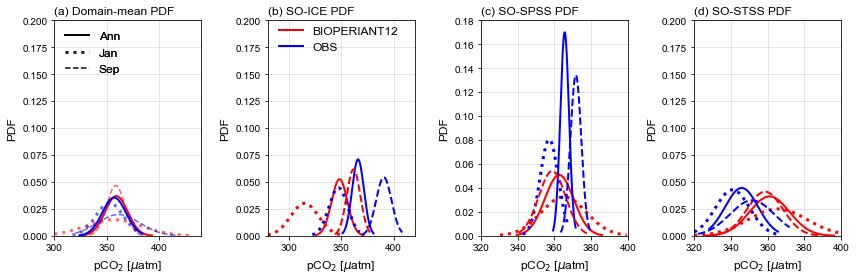

In [14]:
fig = plt.figure(figsize=(12,4))

ax0 = fig.add_subplot(141)
ax0.plot(pco2_pdf_mdl.val.sel(month=13), pco2_pdf_mdl.pdf.sel(month=13),'r', lw=2)
ax0.plot(pco2_pdf_mdl.val.sel(month=1), pco2_pdf_mdl.pdf.sel(month=1),'r', alpha=0.6, linestyle=':', lw=3)
ax0.plot(pco2_pdf_mdl.val.sel(month=9), pco2_pdf_mdl.pdf.sel(month=9),'r', alpha=0.6, linestyle='--')
ax0.plot(pco2_pdf_obs.val.sel(month=13), pco2_pdf_obs.pdf.sel(month=13),'b', lw=2)
ax0.plot(pco2_pdf_obs.val.sel(month=1),  pco2_pdf_obs.pdf.sel(month=1), 'b', alpha=0.6, linestyle=':', lw=3)
ax0.plot(pco2_pdf_obs.val.sel(month=9),  pco2_pdf_obs.pdf.sel(month=9), 'b', alpha=0.6, linestyle='--')
ax0.set_xlabel("pCO$_2$ [$\mu$atm]", labelpad=5, fontsize=12)
ax0.set_ylabel("PDF", labelpad=5, fontsize=12)
ax0.set_xlim(300,440)
ax0.set_ylim(0, 0.2)
ax0.grid(lw=1, c='0.75', alpha=0.4)
## Legend
line_ann = mpl.lines.Line2D([], [],  color='k', lw=2, label='Ann')
line_jan = mpl.lines.Line2D([], [],  color='k', alpha=0.6, linestyle=':', lw=3, label='Jan')
line_sep = mpl.lines.Line2D([], [],  color='k', alpha=0.6, linestyle='--', label='Sep')
legPDF1 = ax0.legend(handles = [line_ann, line_jan, line_sep], ncol=1, fontsize=12, 
                  bbox_to_anchor=(0, 0.7, 0.2, 0.2), loc="lower left",frameon=False)
ax0.add_artist(legPDF1)
ax0.set_rasterized(True)
plt.title(f'(a) Domain-mean PDF',loc='left',fontsize=12)


ax = fig.add_subplot(142)
ax.plot(pco2_bpdf_mdl.val17.sel(month=13), pco2_bpdf_mdl.pdf17.sel(month=13), 'r', lw=2, label='BIOPERIANT12')
ax.plot(pco2_bpdf_obs.val17.sel(month=13), pco2_bpdf_obs.pdf17.sel(month=13), 'b', lw=2, label='OBS')
ax.plot(pco2_bpdf_mdl.val17.sel(month=1),  pco2_bpdf_mdl.pdf17.sel(month=1), 'r', linestyle=":", lw=3)
ax.plot(pco2_bpdf_obs.val17.sel(month=1),  pco2_bpdf_obs.pdf17.sel(month=1), 'b', linestyle=":", lw=3)
ax.plot(pco2_bpdf_mdl.val17.sel(month=9),  pco2_bpdf_mdl.pdf17.sel(month=9), 'r', linestyle="--", lw=2)
ax.plot(pco2_bpdf_obs.val17.sel(month=9),  pco2_bpdf_obs.pdf17.sel(month=9), 'b', linestyle="--", lw=2)
ax.set_xlim(280,420)
ax.set_ylim(0, 0.2)
ax.set_xlabel("pCO$_2$ [$\mu$atm]", labelpad=5, fontsize=12)
ax.set_ylabel("PDF", labelpad=5, fontsize=12)
ax.grid(lw=1, c='0.75', alpha=0.4)
ax.set_rasterized(True)
ax.legend(ncol=1, fontsize=12, 
                  bbox_to_anchor=(0., 0.8, 0.4, 0.2), loc="lower left",frameon=False)
plt.title(f'(b) SO-ICE PDF',loc='left',fontsize=12)


ax2 = fig.add_subplot(143)
ax2.plot(pco2_bpdf_mdl.val16.sel(month=13), pco2_bpdf_mdl.pdf16.sel(month=13), 'r', lw=2)
ax2.plot(pco2_bpdf_obs.val16.sel(month=13), pco2_bpdf_obs.pdf16.sel(month=13), 'b', lw=2)
ax2.plot(pco2_bpdf_mdl.val16.sel(month=1),  pco2_bpdf_mdl.pdf16.sel(month=1), 'r', linestyle=":", lw=3)
ax2.plot(pco2_bpdf_obs.val16.sel(month=1),  pco2_bpdf_obs.pdf16.sel(month=1), 'b', linestyle=":", lw=3)
ax2.plot(pco2_bpdf_mdl.val16.sel(month=9),  pco2_bpdf_mdl.pdf16.sel(month=9), 'r', linestyle="--", lw=2)
ax2.plot(pco2_bpdf_obs.val16.sel(month=9),  pco2_bpdf_obs.pdf16.sel(month=9), 'b', linestyle="--", lw=2)
ax2.set_xlim(320,400)
ax2.set_ylim(0, 0.18)
ax2.grid(lw=1, c='0.75', alpha=0.4)
ax2.set_xlabel("pCO$_2$ [$\mu$atm]", labelpad=5, fontsize=12)
ax2.set_ylabel("PDF", labelpad=5, fontsize=12)
ax2.set_rasterized(True)
plt.title(f'(c) SO-SPSS PDF',loc='left',fontsize=12)

ax3 = fig.add_subplot(144)
ax3.plot(pco2_bpdf_mdl.val15.sel(month=13), pco2_bpdf_mdl.pdf15.sel(month=13), 'r', lw=2)
ax3.plot(pco2_bpdf_obs.val15.sel(month=13), pco2_bpdf_obs.pdf15.sel(month=13), 'b', lw=2)
ax3.plot(pco2_bpdf_mdl.val15.sel(month=1),  pco2_bpdf_mdl.pdf15.sel(month=1), 'r', linestyle=":", lw=3)
ax3.plot(pco2_bpdf_obs.val15.sel(month=1),  pco2_bpdf_obs.pdf15.sel(month=1), 'b', linestyle=":", lw=3)
ax3.plot(pco2_bpdf_mdl.val15.sel(month=9),  pco2_bpdf_mdl.pdf15.sel(month=9), 'r', linestyle="--", lw=2)
ax3.plot(pco2_bpdf_obs.val15.sel(month=9),  pco2_bpdf_obs.pdf15.sel(month=9), 'b', linestyle="--", lw=2)
ax3.set_xlim(320,400)
ax3.set_ylim(0, 0.2)
ax3.grid(lw=1, c='0.75', alpha=0.4)
ax3.set_xlabel("pCO$_2$ [$\mu$atm]", labelpad=5, fontsize=12)
ax3.set_ylabel("PDF", labelpad=5, fontsize=12)
ax3.set_rasterized(True)
plt.title(f'(d) SO-STSS PDF',loc='left',fontsize=12)
plt.tight_layout()
plt.savefig(f'../figures/S13.png')